In [74]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity
import time      
import pandas as pd

In [75]:

def plot_kde(values, feature_name, sampler):
        kde = KernelDensity(bandwidth='silverman', kernel='gaussian')
        # plot it
        kde.fit(values[:, None])
        min = np.min(values)
        max = np.max(values)
        x = np.linspace(min, max, 100000)
        logprob = kde.score_samples(x[:, None])
        plt.fill_between(x, np.exp(logprob), alpha=0.5)
        plt.title(f'{feature_name} KDE, sampler: {sampler}')
        plt.show()



def plot_comparative_kde(values_original, values_sampled, feature_name, sampler):
    # the same but compare to kde of values_original
    kde = KernelDensity(bandwidth='silverman', kernel='gaussian')
    # plot it
    kde.fit(values_original[:, None])
    min = np.min(values_original)
    max = np.max(values_original)
                                                
    x = np.linspace(min, max, 100000)
    logprob = kde.score_samples(x[:, None])
    plt.fill_between(x, np.exp(logprob), alpha=0.5, label='original')
    kde.fit(values_sampled[:, None])

    x = np.linspace(min, max, 100000)
    logprob = kde.score_samples(x[:, None])
    plt.fill_between(x, np.exp(logprob), alpha=0.5, label='sampled')
    plt.title(f'{feature_name} KDE, sampler: {sampler}')
    plt.legend()
    plt.show()

def plot_head_to_head_kde(values_original, values_sampler_1, values_sampler_2, feature_name, sampler_1_name, sampler_2_name):
        # the same but compare to kde of values_original
        kde = KernelDensity(bandwidth='silverman', kernel='gaussian')
        # plot it
        kde.fit(values_original[:, None])
        min = np.min(values_original)
        max = np.max(values_original)
                                                        
        x = np.linspace(min, max, 100000)
        logprob = kde.score_samples(x[:, None])
        plt.fill_between(x, np.exp(logprob), alpha=0.5, label='original')
        kde.fit(values_sampler_1[:, None])
        
        x = np.linspace(min, max, 100000)
        logprob = kde.score_samples(x[:, None])
        plt.fill_between(x, np.exp(logprob), alpha=0.5, label=sampler_1_name)
        kde.fit(values_sampler_2[:, None])
        
        x = np.linspace(min, max, 100000)
        logprob = kde.score_samples(x[:, None])
        plt.fill_between(x, np.exp(logprob), alpha=0.5, label=sampler_2_name)
        plt.title(f'{feature_name} KDE')
        plt.legend()
        plt.show()

In [76]:
def plot_kde_per_feature_sampled(paths, feature_names, sampler_names):
    dfs = [pd.read_csv(path, header=None) for path in paths]

    for i in range(dfs[0].shape[1]):
        for j in range(len(dfs)):
            df = dfs[j]
            plot_kde(df.iloc[:, i].values, feature_names[i], sampler_names[j])


def plot_comparative_kde_per_feature_sampled(original_path, paths, feature_names, sampler_names):
    original = pd.read_csv(original_path)
    dfs = [pd.read_csv(path, header=None) for path in paths]

    for i in range(original.shape[1]):
        for j in range(len(dfs)):
            df = dfs[j]
            plot_comparative_kde(original.iloc[:, i].values, df.iloc[:, i].values, feature_names[i], sampler_names[j])


def plot_head_to_head_kde_per_feature_sampled(original_path, path_1, path_2, feature_names, sampler_1_name, sampler_2_name):
    original = pd.read_csv(original_path)
    df_1 = pd.read_csv(path_1, header=None)
    df_2 = pd.read_csv(path_2, header=None)

    for i in range(original.shape[1]):
        plot_head_to_head_kde(original.iloc[:, i].values, df_1.iloc[:, i].values, df_2.iloc[:, i].values, feature_names[i], sampler_1_name, sampler_2_name)

In [77]:
def get_feature_names(path):
    df = pd.read_csv(path)
    return df.columns

In [2]:
DATASET_USED = 'Abalone'
SAMPLERS = ['random', 'kl']
SAMPLE_SIZE = 500
SAMPLE_ID = 0 #TODO: make it random or set specific ones for testing

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Sex_F', 'Sex_I', 'Sex_M', 'Rings'],
      dtype='object')


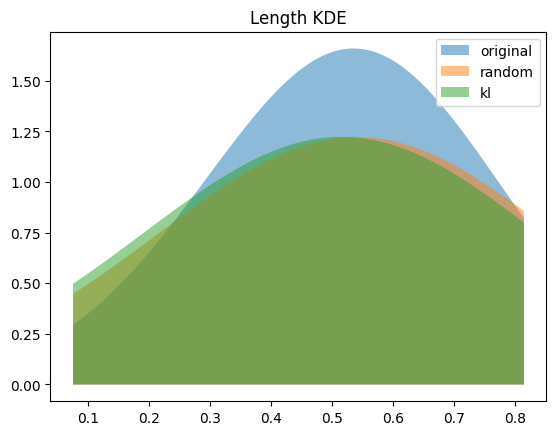

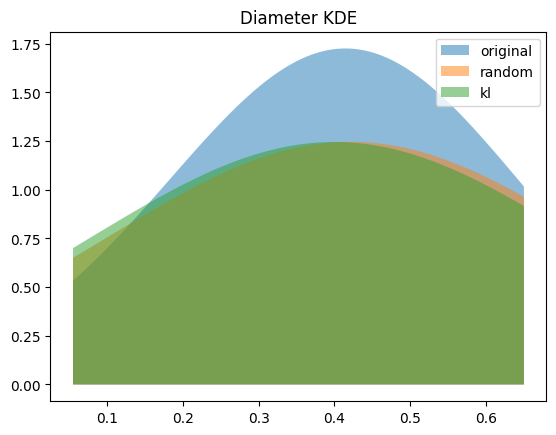

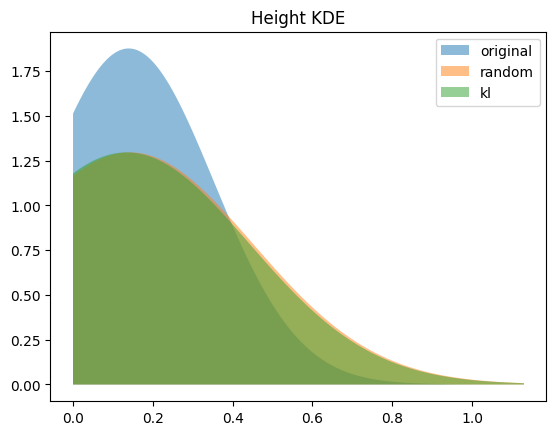

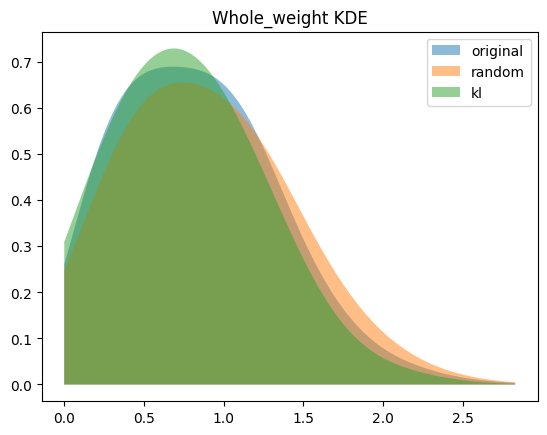

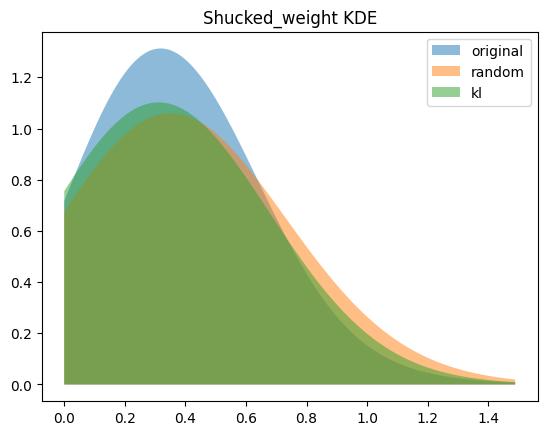

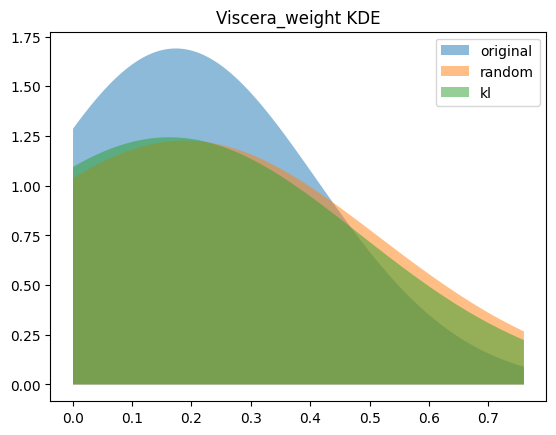

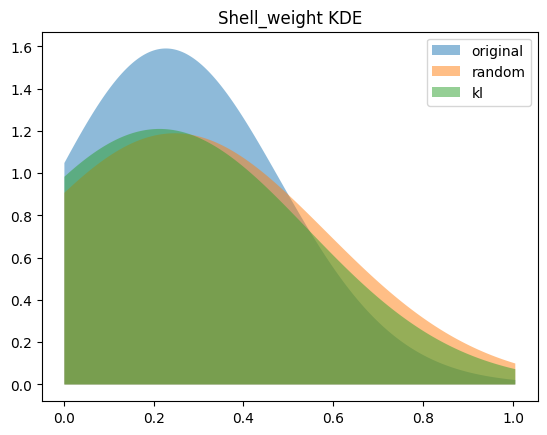

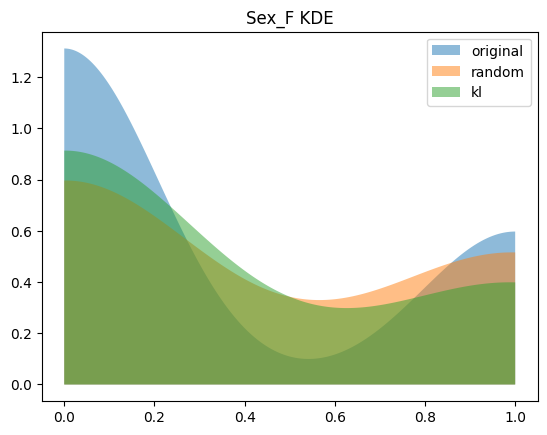

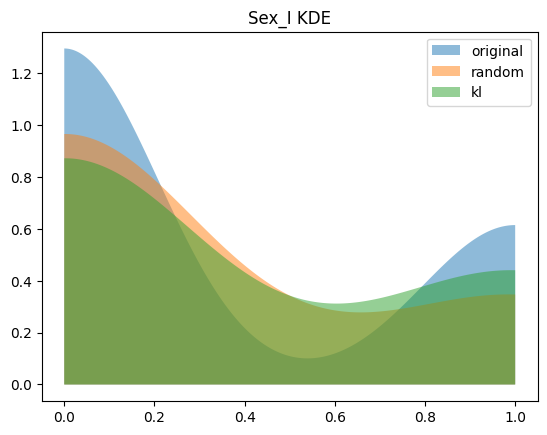

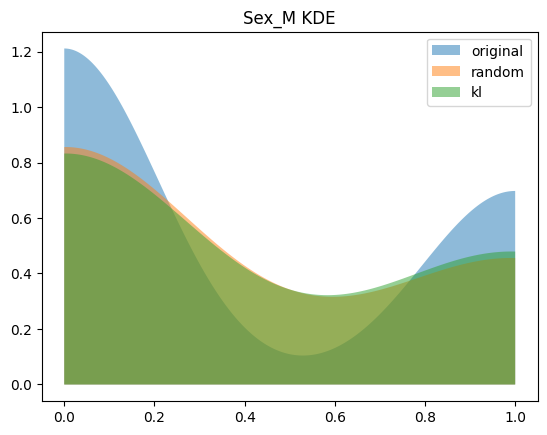

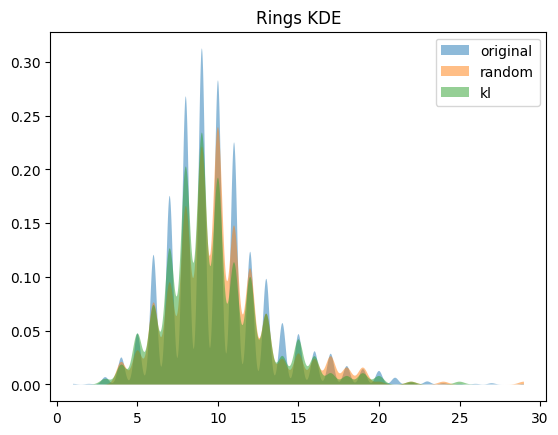

In [79]:
PATHS = [f'data/sampled_datasets/{DATASET_USED}/{sampler}/{SAMPLE_SIZE}/sample_{SAMPLE_ID}.csv' for sampler in SAMPLERS]
PATH_ORIGINAL = f'data/split_datasets/{DATASET_USED}/train.csv'

feature_names = get_feature_names(PATH_ORIGINAL)
print(feature_names)
#plot_kde_per_feature_sampled(PATHS, feature_names, SAMPLERS)

#plot_comparative_kde_per_feature_sampled(PATH_ORIGINAL, PATHS, feature_names, SAMPLERS)

plot_head_to_head_kde_per_feature_sampled(PATH_ORIGINAL, PATHS[0], PATHS[1], feature_names, SAMPLERS[0], SAMPLERS[1])